Question 2

Epilepsy is a nervous system disorder that affects movement. The dataset
contains 195 records of various people with 23 features that contain
biomedical measurements. Your model will be used to differentiate
healthy people from people having the disease. Target Column is 'status'.
Identify the model with the best params.
Data Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data

In [44]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [45]:
df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data',sep=",")

In [46]:
df.to_csv('epilepsy.csv',index=False)

In [47]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [49]:
df.describe(include='all')

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
unique,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,phon_R01_S01_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,NaN,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,NaN,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,NaN,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,NaN,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,NaN,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980


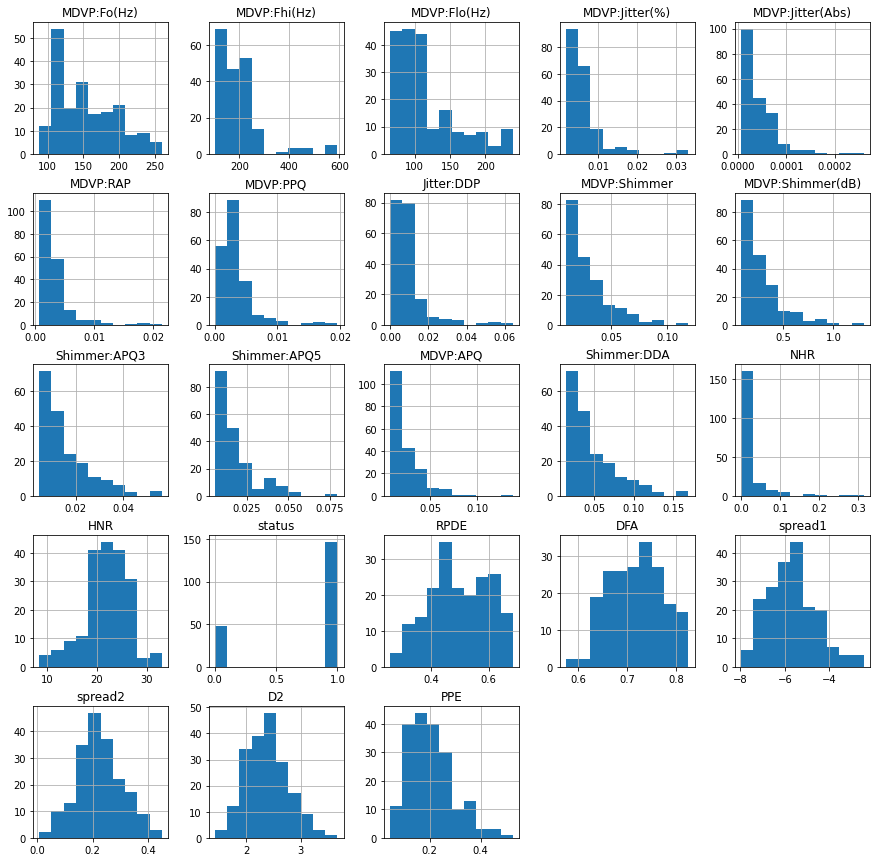

In [57]:
rcParams['figure.figsize'] = 15,15
df.hist()
plt.show()

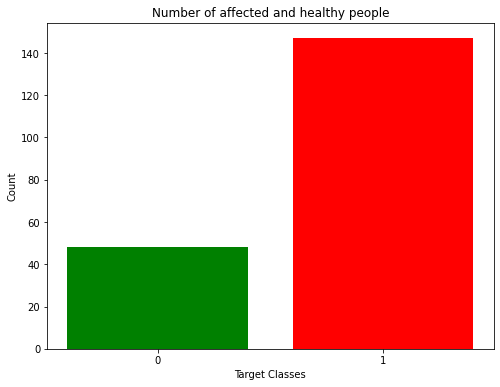

In [50]:
rcParams['figure.figsize'] = 8,6

plt.bar(df['status'].unique(), df['status'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Number of affected and healthy people')

plt.show()

# 0- healthy 
# 1- affected 

In [51]:
df['MDVP:PPQ']=df['MDVP:PPQ'].fillna(int(df['MDVP:PPQ'].mean()))
df['Jitter:DDP']=df['Jitter:DDP'].fillna(int(df['Jitter:DDP'].mean()))

In [52]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [53]:
#Removing unwanted columns
final_df=df.drop('name',axis=1)

In [54]:
x=final_df.drop('status',axis=1)
y=final_df['status']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

MDVP:RAP	MDVP:PPQ	Jitter:DDP are strogly correlated with MDVP:Fhi(Hz) and MDVP:Jitter(%) and  MDVP:Jitter(Abs)

In [59]:
scaler=StandardScaler()
std_x_train=scaler.fit_transform(x_train)
std_x_test=scaler.fit_transform(x_test)

# Modelling: Knn classification

In [60]:
knn=KNeighborsClassifier()
knn.fit(std_x_train,y_train)

KNeighborsClassifier()

In [61]:
knn_score=knn.score(std_x_test,y_test)
print(knn_score)

0.9487179487179487


# Modelling: Logistic regression 

In [62]:
log_reg=LogisticRegression()
log_reg.fit(std_x_train,y_train)

LogisticRegression()

In [63]:
log_reg_score=log_reg.score(std_x_test,y_test)
print(log_reg_score)

0.8974358974358975



# Modelling: XGB classifier

In [64]:
xgb=XGBClassifier()
xgb.fit(std_x_train,y_train)

XGBClassifier()

In [65]:
xgb_score=xgb.score(std_x_test,y_test)
print(xgb_score)

0.9487179487179487


# Modelling : Desicion tree

In [66]:
desicion_tree=DecisionTreeClassifier()
desicion_tree.fit(std_x_train,y_train)

DecisionTreeClassifier()

In [67]:
desicion_tree_score = desicion_tree.score(std_x_test,y_test)
print(desicion_tree_score)

0.717948717948718


# Modelling: Support vector machine 

In [68]:
svm=SVC(kernel='linear')
svm.fit(std_x_train,y_train)

SVC(kernel='linear')

In [69]:
svm_score = svm.score(std_x_test,y_test)
print(svm_score)

0.8717948717948718


In [70]:
# Modelling: all the models

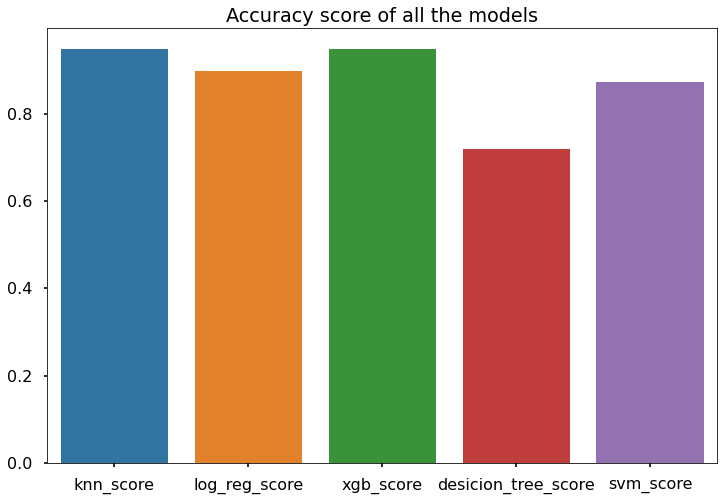

In [71]:
score=[knn_score,log_reg_score,xgb_score,desicion_tree_score,svm_score]
models=['knn_score','log_reg_score','xgb_score','desicion_tree_score','svm_score']
plt.figure(figsize=(12,8))
plt.style.use('seaborn-poster')
sns.barplot(x=models,y=score)
plt.title("Accuracy score of all the models")
plt.show()

# Feature selection

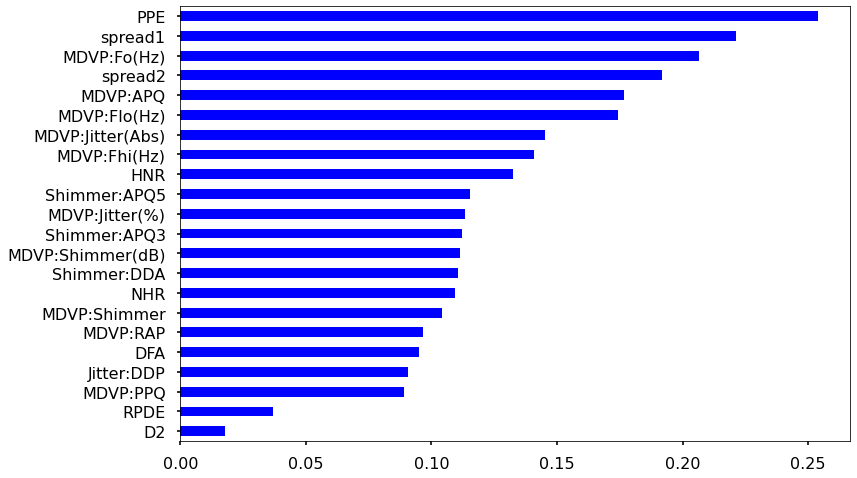

In [72]:
plt.figure(figsize=(12,8))
importances = mutual_info_classif(x,y)
feature_importance = pd.Series(importances,x.columns)
feature_importance=feature_importance.sort_values(ascending=True)
feature_importance.plot(kind='barh',color='blue')
plt.show()